<a href="https://colab.research.google.com/github/kdduha/cs102/blob/homework06/homework06/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [18]:
# импорт всех нужных модулей
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. подклюение google-drive и нашего датасета
drive.mount('/content/drive/')
music_genre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Программирование /lab 6/music_genre.csv')

# 2. вытащим 20_000 случайных строк
db = music_genre.iloc[random.sample(list(range(music_genre.shape[0])), 20_000)]
# заново пронумеруем индексы
db = db.reset_index(drop=True)

db.head(3)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,49375.0,The Bloody Beetroots,Irreversible (feat. Anders Friden),35.0,0.00006,0.259,185333.0,0.687,0.00862,G#,0.338,-3.231,Major,0.0413,135.532,4-Apr,0.114,Electronic
1,54190.0,Freddie Joachim,Shoulder Kiss,52.0,0.44100,0.774,156107.0,0.502,0.01930,A#,0.158,-5.371,Major,0.1080,95.084,4-Apr,0.736,Jazz
2,83143.0,Vincent,No Mercy,30.0,0.07350,0.559,212308.0,0.607,0.28800,C,0.139,-6.575,Major,0.0755,129.988,4-Apr,0.190,Electronic


In [19]:
# 3. удалим дубликаты и проверим, были ли они, по кол-ву строк новой и старой таблицы
old_db_shape = db.shape[0]
db = db.drop_duplicates()
print('дубликатов не было' if old_db_shape == db.shape[0] else 'дубликаты были')

дубликатов не было


In [20]:
# 4. все строки в artist_name c empty_field
db_empty_artists = db[db['artist_name'] == 'empty_field']

print(f'Всего {db_empty_artists.shape[0]} строк со значением empty_field в колонке artist_name')
db_empty_artists.head(3)

Всего 1015 строк со значением empty_field в колонке artist_name


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
12,35733.0,empty_field,Rolling In The Deep - Recorded At Spotify Stud...,59.0,0.00570,0.615,237653.0,0.487,0.00299,B,0.0995,-10.089,Minor,0.0269,104.986,4-Apr,0.323,Blues
21,52752.0,empty_field,MTRD,35.0,0.00177,0.682,255000.0,0.879,0.38500,B,0.0872,-4.709,Minor,0.0535,127.977,4-Apr,0.250,Electronic
75,52279.0,empty_field,Taketori Overnight Sensation,11.0,0.08050,0.518,246747.0,0.949,0.00000,G,0.5590,-2.893,Major,0.1690,200.02599999999998,4-Apr,0.656,Anime


In [21]:
# удалим все строчки с таким значением и восстановим индексы
clear_db = db.drop(db_empty_artists.index).reset_index(drop=True)

print(f'до удаления строк с empty_field было {db.shape[0]} строк, после удаления стало {clear_db.shape[0]} строк')
clear_db.head(3)

до удаления строк с empty_field было 20000 строк, после удаления стало 18985 строк


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,49375.0,The Bloody Beetroots,Irreversible (feat. Anders Friden),35.0,0.00006,0.259,185333.0,0.687,0.00862,G#,0.338,-3.231,Major,0.0413,135.532,4-Apr,0.114,Electronic
1,54190.0,Freddie Joachim,Shoulder Kiss,52.0,0.44100,0.774,156107.0,0.502,0.01930,A#,0.158,-5.371,Major,0.1080,95.084,4-Apr,0.736,Jazz
2,83143.0,Vincent,No Mercy,30.0,0.07350,0.559,212308.0,0.607,0.28800,C,0.139,-6.575,Major,0.0755,129.988,4-Apr,0.190,Electronic


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [22]:
# 1. выведем долю каждого жанра в датасете
genre_share = pd.DataFrame(clear_db['music_genre'].value_counts(normalize=True)).rename(columns={'music_genre' : 'share_of_genres'})
genre_share

,share_of_genres
Hip-Hop,0.101612
Electronic,0.101032
Jazz,0.100980
Anime,0.100664
Rap,0.100506
Country,0.100506
Rock,0.100400
Blues,0.100032
Classical,0.099241
Alternative,0.095027


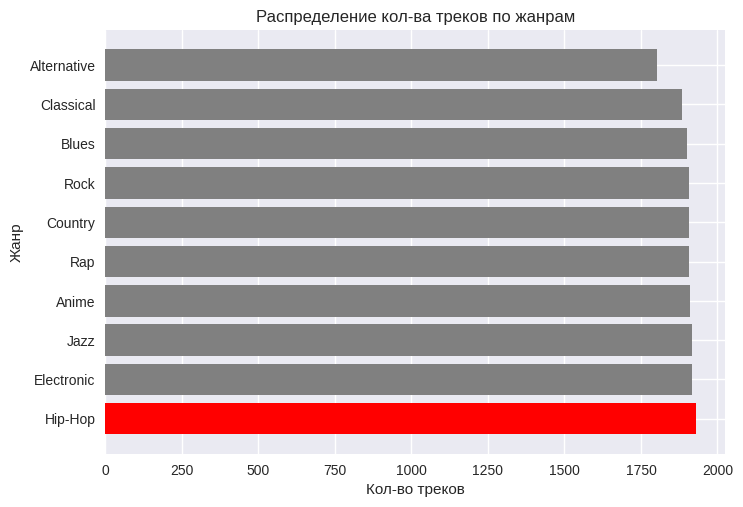

In [23]:
# 2. распределение кол-ва треков по жанрам
# поставим стиль seaborn
plt.style.use('seaborn-v0_8')

# построим горизонтальную диаграмму и закрасим наибольший жанр
genre_count = clear_db['music_genre'].value_counts()

fig, ax = plt.subplots()
ax.barh(genre_count.index, genre_count.values, color='gray')
ax.barh(genre_count.idxmax(), genre_count.values, color='red')

ax.set_title('Распределение кол-ва треков по жанрам')
ax.set_ylabel('Жанр')
ax.set_xlabel('Кол-во треков')

plt.show()

In [24]:
# 3. посчитаем среднее значение danceability у каждого жанра и выведем максимальное
dance_genre = clear_db.groupby(['music_genre'])['danceability'].mean().idxmax()
dance_genre_mean = clear_db[clear_db['music_genre'] == dance_genre]['danceability'].mean()
print(f'Жанр {dance_genre} самый танцевальный. Среднее значение "танцевальности" = {round(dance_genre_mean, 3)}')

Жанр Hip-Hop самый танцевальный. Среднее значение "танцевальности" = 0.719


In [25]:
# 4. определим преобладающую тональность
# создадим соотвествующий df объект с колонками major и minor
mode_share = pd.DataFrame(clear_db.groupby(['music_genre', 'mode']).size().unstack())

# создадим доп.колонку, где прописана преобладающая тональность
# заполним циклом, сравнивая значения
mode_share['the_most_popular_mode'] = np.zeros(mode_share.shape[0])
for ind in mode_share.index:
  if mode_share['Major'][ind] > mode_share['Minor'][ind]:
    mode_share.at[ind, 'the_most_popular_mode'] = 'major'
  elif mode_share['Minor'][ind] > mode_share['Minor'][ind]:
    mode_share.at[ind, 'the_most_popular_mode'] = 'minor'
  else:
    mode_share.at[ind, 'the_most_popular_mode'] = 'equally'

mode_share

mode,Major,Minor,the_most_popular_mode
music_genre,,,
Alternative,1177,627,major
Anime,1177,734,major
Blues,1317,582,major
Classical,1253,631,major
Country,1671,237,major
Electronic,1011,907,major
Hip-Hop,1076,853,major
Jazz,1012,905,major
Rap,1071,837,major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [26]:
# 1. Топ испольнитель по трекам, и анти-топ исполнитель по треками
top_artists = pd.DataFrame(clear_db['artist_name'].value_counts())
top_artists.iloc[[0, -1]]



,artist_name
Nobuo Uematsu,169
Johnny Pacheco,1


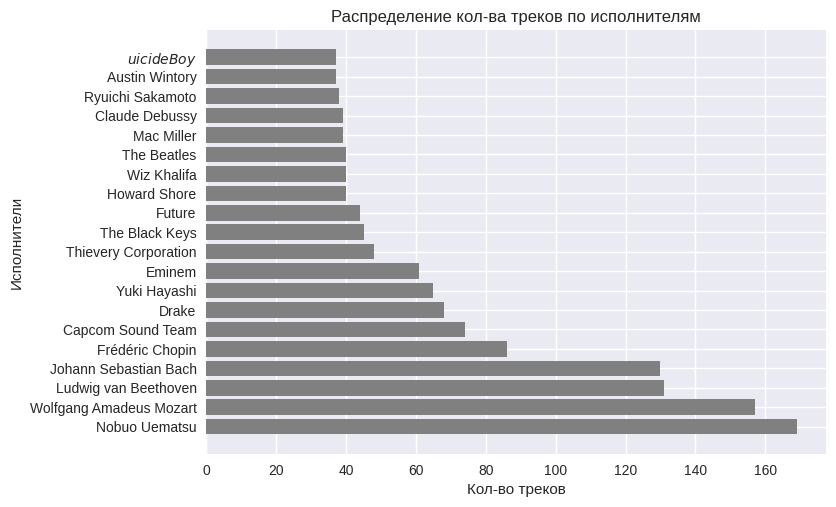

In [27]:
# 2. Выведем первые 20 исполнителей в горизонт.столб.диаграмму
top_20_artists = top_artists.iloc[range(20)].rename(columns={'artist_name' : 'tracks'})

# т.к. мы сделали срез, то values будут являться списками, потому приведем все к одномерному массиву .ravel()
fig, ax = plt.subplots()
ax.barh(top_20_artists.index, top_20_artists.values.ravel(), color='gray')

ax.set_title('Распределение кол-ва треков по исполнителям')
ax.set_ylabel('Исполнители')
ax.set_xlabel('Кол-во треков')

plt.show()

Можно заметить, что в базе лидируют треки классических испольнителей (Бетховен, Бах, Моцарт и т.д.), а также современный японский композитор музыки для видеоигр Нобуо Уэмацу, на что видимо есть большой спрос на рынке. Люди обожают аниме и японский игропром (а также извечно не стареющую классику)!

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [28]:
# 1. построим кор.матрицу для всех числовых характеристик треков
cor_matrix = clear_db[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']].corr()
cor_matrix

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.293361,0.368773,-0.087643,0.217543,-0.366479,-0.033665,0.321360,0.224884,0.125509
acousticness,-0.293361,1.000000,-0.353755,0.059678,-0.793225,0.386114,-0.106727,-0.731883,-0.166104,-0.265691
danceability,0.368773,-0.353755,1.000000,-0.152899,0.266455,-0.300763,-0.048213,0.397401,0.281266,0.434982
duration_ms,-0.087643,0.059678,-0.152899,1.000000,-0.064747,0.126482,0.022130,-0.099660,-0.083615,-0.125886
energy,0.217543,-0.793225,0.266455,-0.064747,1.000000,-0.391157,0.186949,0.837167,0.158881,0.394524
instrumentalness,-0.366479,0.386114,-0.300763,0.126482,-0.391157,1.000000,-0.091950,-0.528361,-0.199897,-0.263441
liveness,-0.033665,-0.106727,-0.048213,0.022130,0.186949,-0.091950,1.000000,0.130958,0.126842,0.047019
loudness,0.321360,-0.731883,0.397401,-0.099660,0.837167,-0.528361,0.130958,1.000000,0.167828,0.338409
speechiness,0.224884,-0.166104,0.281266,-0.083615,0.158881,-0.199897,0.126842,0.167828,1.000000,0.063937
valence,0.125509,-0.265691,0.434982,-0.125886,0.394524,-0.263441,0.047019,0.338409,0.063937,1.000000


In [29]:
# алгоритм нахождения высокой корреляции (> 0.7) и низкой корелляции (< 0.2)
# отриц. корреляция говорит только об обратной пропорциональности изменения характеристик

high, low = 0.7, 0.2
high_char, low_char, zero_char = [], [], []

for i in range(1, cor_matrix.shape[1]):
  for j in range(i):
    if abs(cor_matrix.iloc[i, j]) >= high:
      high_char.append((cor_matrix.columns[i], cor_matrix.columns[j]))
    elif abs(cor_matrix.iloc[i, j]) <= 0.05:
      zero_char.append((cor_matrix.columns[i], cor_matrix.columns[j]))
    elif abs(cor_matrix.iloc[i, j]) <= low:
      low_char.append((cor_matrix.columns[i], cor_matrix.columns[j]))

print("Признаки с высокой корреляцией:")
for pair in high_char:
    print(f"{pair[0]} и {pair[1]}")

print("\nПризнаки с низкой корреляцией:")
for pair in low_char:
    print(f"{pair[0]} и {pair[1]}")

print("\nПризнаки с ОЧЕНЬ низкой корреляцией:")
for pair in zero_char:
    print(f"{pair[0]} и {pair[1]}")

Признаки с высокой корреляцией:
energy и acousticness
loudness и acousticness
loudness и energy

Признаки с низкой корреляцией:
duration_ms и popularity
duration_ms и acousticness
duration_ms и danceability
energy и duration_ms
instrumentalness и duration_ms
liveness и acousticness
liveness и energy
liveness и instrumentalness
loudness и duration_ms
loudness и liveness
speechiness и acousticness
speechiness и duration_ms
speechiness и energy
speechiness и instrumentalness
speechiness и liveness
speechiness и loudness
valence и popularity
valence и duration_ms
valence и speechiness

Признаки с ОЧЕНЬ низкой корреляцией:
liveness и popularity
liveness и danceability
liveness и duration_ms
valence и liveness


In [30]:
# 3. кор. м/у популярностью и длиной названия
popularity_corr = clear_db['popularity'].corr(clear_db['track_name'].str.len())
print("Корреляция между популярностью и длиной названия трека:", popularity_corr)

Корреляция между популярностью и длиной названия трека: -0.22435179163405244


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

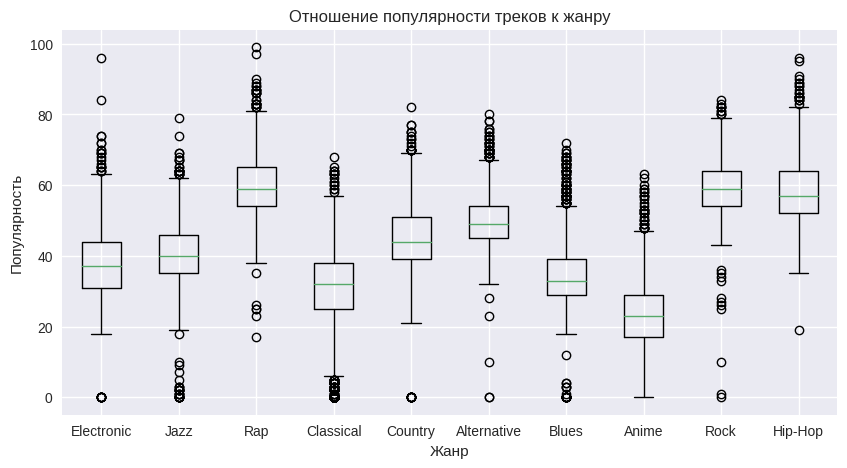

In [31]:
# достанем все жанры и сопаставим каждому значения популярностей с ними
genres = clear_db['music_genre'].unique()
# удалим NaN (вдруг они есть)
genres = genres[~pd.isnull(genres)]

popularity_by_genre = []
for genre in genres:
    popularity_by_genre.append(clear_db[clear_db['music_genre'] == genre]['popularity'])

# ящиковая диаграмма
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(popularity_by_genre)

ax.set_title('Отношение популярности треков к жанру')
ax.set_xticklabels(genres)
ax.set_ylabel('Популярность')
ax.set_xlabel('Жанр')

plt.show()

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

In [32]:
# сгруппируем жанры и артистов со среднем значением популярности
grouped = clear_db.groupby(['music_genre', 'artist_name'], as_index=False)['popularity'].mean()
# вытащим первые топ3 жанра по популярности (сортируем по убыванию)
genres_top_3 = grouped.groupby('music_genre')['popularity'].sum().sort_values(ascending=False).iloc[:3]
# вытащим названия жанров как индексы
genres_top_3 = genres_top_3.index.tolist()


# узнаем самого популярного исполнителя по каждому жанру
artist_by_genre = []
for genre in genres_top_3:
    artist_top = grouped[grouped['music_genre'] == genre].sort_values('popularity', ascending=False)
    # достанем только первых исполнителей
    artist_by_genre.append(artist_top.iloc[0]['artist_name'])


# отфильтруем df по топ3 жанрам и самым популярным исполнителям 
genres_and_artists = clear_db[clear_db['music_genre'].isin(genres_top_3) & clear_db['artist_name'].isin(artist_by_genre)]
# еще раз сгруппируем и подсчитаем кол-во 
grouped = genres_and_artists.groupby(['music_genre', 'artist_name'], as_index=False)['popularity'].count()
grouped

,music_genre,artist_name,popularity
0,Alternative,Fountains Of Wayne,1
1,Alternative,Smash Mouth,2
2,Hip-Hop,Metro Boomin,1
3,Rock,Smash Mouth,1


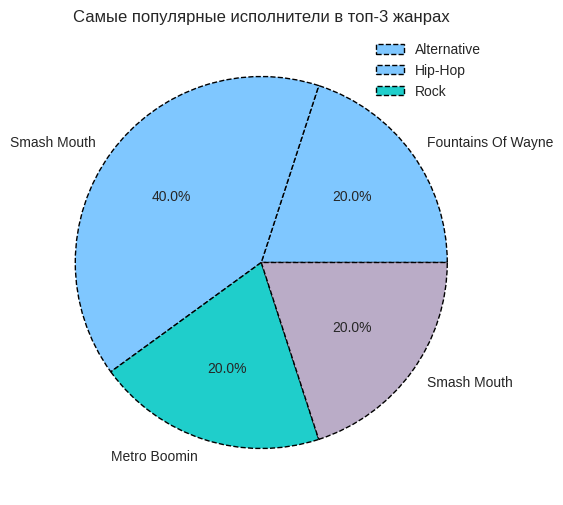

In [52]:
# строим круг.диаграмму
fig, ax = plt.subplots(figsize=(6, 10))


colors_for_diag = dict(zip(np.unique(grouped['music_genre'].values), ['#7fc7ff','#1fcecb' ,'#baacc7']))
colors = [colors_for_diag[genre] for genre in grouped['music_genre'].values]

ax.pie(grouped['popularity'], labels=grouped['artist_name'], colors=colors, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, autopct='%1.1f%%')

ax.legend(np.unique(grouped['music_genre'].values), loc=1)
ax.set_title('Самые популярные исполнители в топ-3 жанрах')

plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

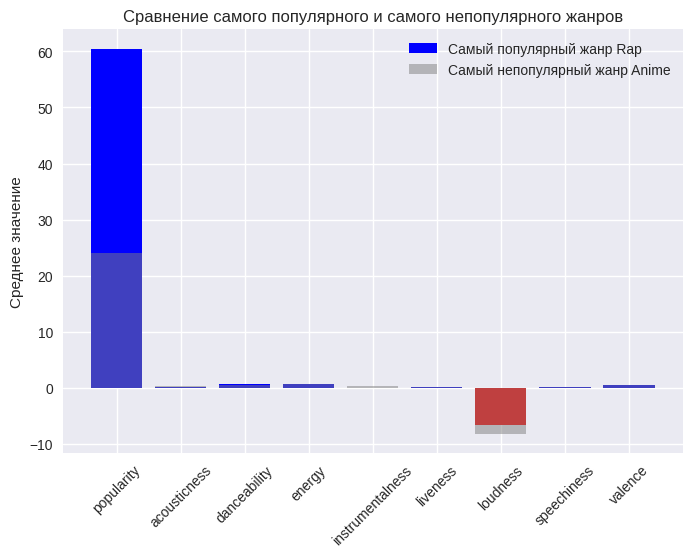

In [90]:
# отфильтруем df по популярным и непопулярным жанрам
pop_genre = clear_db.groupby(['music_genre'])['popularity'].mean().idxmax()
not_pop_genre = clear_db.groupby(['music_genre'])['popularity'].mean().idxmin()

pop_genre_stat = clear_db[clear_db['music_genre'] == pop_genre].mean(numeric_only=True).drop(['instance_id', 'duration_ms'])
not_pop_genre_stat = clear_db[clear_db['music_genre'] == not_pop_genre].mean(numeric_only=True).drop(['instance_id', 'duration_ms'])

# строим диаграмму
fig, ax = plt.subplots()
colors = ['red' if x < 0 else 'blue' for x in pop_genre_stat]
ax.bar(pop_genre_stat.index, pop_genre_stat.values, color=colors)
ax.bar(not_pop_genre_stat.index, not_pop_genre_stat.values, color='gray', alpha=0.5)

ax.set_title('Сравнение самого популярного и самого непопулярного жанров')
ax.set_ylabel('Среднее значение')
ax.legend([f'Самый популярный жанр {pop_genre}', f'Самый непопулярный жанр {not_pop_genre}'])
plt.xticks(rotation=45)

plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [91]:
# 1. добавип категориальный столбец
clear_db['длительность_трек'] = np.zeros(clear_db.shape[0])
for i in range(clear_db.shape[0]):
  time = clear_db['duration_ms'][i]
  if time <= 180_000:
    clear_db.at[i, 'длительность_трек'] = 'короткая'
  elif 180_00 < time <= 300_000:
    clear_db.at[i, 'длительность_трек'] = 'средняя'
  else:
    clear_db.at[i, 'длительность_трек'] = 'длинная'

clear_db

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трек
0,49375.0,The Bloody Beetroots,Irreversible (feat. Anders Friden),35.0,0.00006,0.259,185333.0,0.6870,0.008620,G#,0.3380,-3.231,Major,0.0413,135.532,4-Apr,0.114,Electronic,средняя
1,54190.0,Freddie Joachim,Shoulder Kiss,52.0,0.44100,0.774,156107.0,0.5020,0.019300,A#,0.1580,-5.371,Major,0.1080,95.084,4-Apr,0.736,Jazz,короткая
2,83143.0,Vincent,No Mercy,30.0,0.07350,0.559,212308.0,0.6070,0.288000,C,0.1390,-6.575,Major,0.0755,129.988,4-Apr,0.190,Electronic,средняя
3,49208.0,Nate Dogg,So Fly,61.0,0.17700,0.605,185813.0,0.6020,0.000000,C,0.4050,-6.837,Minor,0.3980,82.26100000000001,4-Apr,0.829,Rap,средняя
4,25400.0,Franz Schubert,"Introduction & Variations on ""Trockne Blumen"",...",0.0,0.99000,0.378,120520.0,0.0522,0.918000,B,0.1050,-22.261,Minor,0.0453,?,4-Apr,0.106,Classical,короткая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18980,79322.0,Bishop Briggs,Water,47.0,0.55700,0.273,201840.0,0.4320,0.000076,D,0.0868,-6.773,Major,0.0420,84.76799999999999,4-Apr,0.275,Alternative,средняя
18981,35494.0,Cannonball Adderley,Waltz For Debby,37.0,0.69800,0.556,-1.0,0.2580,0.000056,F,0.0954,-11.745,Major,0.0412,83.964,4-Apr,0.414,Jazz,короткая
18982,50434.0,Franz Joseph Haydn,"Haydn : String Quartet in C major Op.76 No.3, ...",25.0,0.98100,0.105,395280.0,0.0713,0.873000,G,0.1420,-25.104,Major,0.0506,64.354,4-Apr,0.117,Classical,длинная
18983,74941.0,Mndsgn,Fif Dim,46.0,0.31000,0.869,170835.0,0.3930,0.595000,B,0.5640,-11.077,Minor,0.4410,138.029,4-Apr,0.773,Jazz,короткая


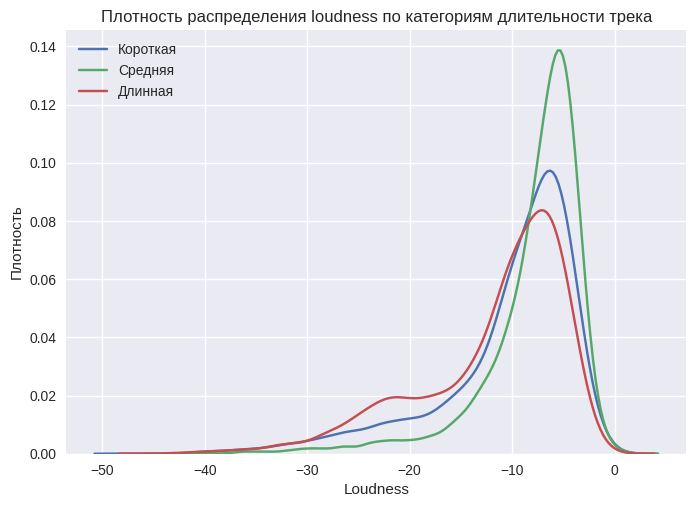

In [94]:
# 2. покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
import seaborn as sns

short = clear_db[clear_db['длительность_трек'] == 'короткая']
medium = clear_db[clear_db['длительность_трек'] == 'средняя']
longg = clear_db[clear_db['длительность_трек'] == 'длинная']

# строим график
sns.kdeplot(short['loudness'], label='Короткая')
sns.kdeplot(medium['loudness'], label='Средняя')
sns.kdeplot(longg['loudness'], label='Длинная')

plt.title('Плотность распределения loudness по категориям длительности трека')
plt.xlabel('Loudness')
plt.ylabel('Плотность')


plt.legend()
plt.show()

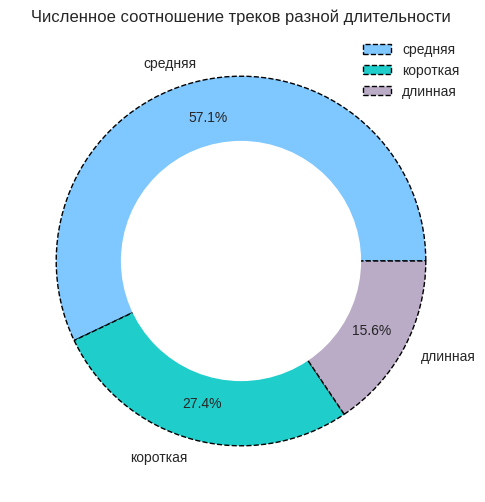

In [105]:
# 3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.
tracks = clear_db['длительность_трек'].value_counts()

# строим круговую диаграмму

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(tracks, labels=tracks.index, colors=['#7fc7ff','#1fcecb' ,'#baacc7'], wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, autopct='%1.1f%%', pctdistance=0.80)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

ax.legend(loc=1)
ax.set_title('Численное соотношение треков разной длительности')

plt.show()